<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/TopicosAvanzadosComputacion2/blob/master/DL_L02_P03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
##Lección 2 - Redes neuronales de una sola neurona
### Programación de neurona lineal mini-batch

Primeramente importemos unos paquetes importantes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definamos nuestra neurona sigmoidal para hacer regresión logística

In [2]:
class Linear_Neuron:

    def __init__(self, n_inputs, learning_rate=0.1):
        self.w = - 1 + 2 * np.random.rand(n_inputs)
        self.b = - 1 + 2 * np.random.rand()
        self.eta = learning_rate

    def predict(self, X):
        Y_est = np.dot(self.w, X) + self.b
        return Y_est

    def batcher(self, X, Y, size):
        p = X.shape[1]
        li, ui = 0, size
        while True:
            if li < p:
                yield X[:, li:ui], Y[:, li:ui]
                li, ui = li + size, ui + size
            else:
                return None
    
    def train(self, X, Y, epochs=100, batch_size=20):

        for _ in range(epochs):
            
            minibatch = self.batcher(X,Y, batch_size)
            
            for mX, mY  in minibatch: 
                p = mX.shape[1]
                Y_est = self.predict(mX)
                self.w += (self.eta/p) * np.dot((mY - Y_est), mX.T).ravel()
                self.b += (self.eta/p) * np.sum(mY - Y_est)


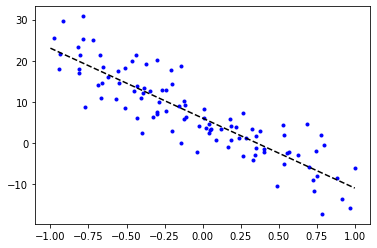

In [3]:
p = 100
x = -1 + 2 * np.random.rand(p).reshape(1,-1)
y = -18 * x + 6 + 5 * np.random.randn(p)
plt.plot(x,y,'.b')

neuron = Linear_Neuron(1, 0.1)
neuron.train(x, y, epochs=100, batch_size=50)

xn = np.array([[-1, 1]])
plt.plot(xn.ravel() ,neuron.predict(xn),'--r')